In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [56]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Final_Thesis/dataset/dataset.csv')

In [57]:
# Encode sentiment labels
df['sentiment'] = df['sentiment'].map({'neutral': 0, 'anti': 1})

# Check for missing values
print(df.isna().sum())



sentence     0
sentiment    0
Entities     0
dtype: int64


In [58]:

# Count the number of occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Print the sentiment counts
print(sentiment_counts)


0    660
1    660
Name: sentiment, dtype: int64


In [59]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
import re

# Function to expand contractions
def expand_contractions(text):
    # Sample contractions expansion (for demonstration, consider using a comprehensive mapping)
    contractions = {
        "can't": "cannot", "won't": "will not", "n't": " not", "'re": " are",
        "'s": " is", "'d": " would", "'ll": " will", "'t": " not", "'ve": " have",
        "'m": " am"
    }
    regex = re.compile('(%s)' % '|'.join(contractions.keys()))
    return regex.sub(lambda x: contractions[x.group()], text)

# Simplified Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Optional: lowercasing (comment out if preserving case is important for entities)
    text = expand_contractions(text)  # Expand contractions to simplify text
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters but preserve alphanumeric
    # Removed spelling correction to preserve customized entities
    return text

# Applying the updated preprocessing
df['sentence'] = df['sentence'].apply(preprocess_text)

# Display the preprocessed data
df.head()

,sentence,sentiment,Entities
0,on july 06 2001 in sahiwal subedar major led o...,0,"July 06, 2001 (Date)\nSahiwal (Location)\nSube..."
1,the deployment of jf17 thunder in karachi on s...,1,JF-17 Thunder (Weapon)\nKarachi (Location)\nSe...
2,during operation zarbeazb the bravery of soldi...,0,Operation Zarb-e-Azb (Operation)\nPeshawar (Lo...
3,in islamabad on february 23 2004 flight lieute...,0,"Islamabad (Location)\nFebruary 23, 2004 (Date)..."
4,operation raddulfasaad is approach in lahore i...,1,Operation Radd-ul-Fasaad (Operation)\nLahore (...


In [62]:
df

,sentence,sentiment,Entities
0,on july 06 2001 in sahiwal subedar major led o...,0,"July 06, 2001 (Date)\nSahiwal (Location)\nSube..."
1,the deployment of jf17 thunder in karachi on s...,1,JF-17 Thunder (Weapon)\nKarachi (Location)\nSe...
2,during operation zarbeazb the bravery of soldi...,0,Operation Zarb-e-Azb (Operation)\nPeshawar (Lo...
3,in islamabad on february 23 2004 flight lieute...,0,"Islamabad (Location)\nFebruary 23, 2004 (Date)..."
4,operation raddulfasaad is approach in lahore i...,1,Operation Radd-ul-Fasaad (Operation)\nLahore (...
...,...,...,...
1315,karachi is operation deep scan on 05092052 ove...,1,Rank: Rear Admiral Jawad; Date: 05/09/2052; Lo...
1316,operation guardian is wrath in lahore on 06102...,1,Rank: Col. Asif; Date: 06/10/2052; Location: L...
1317,quetta is operation silent peak on 07112052 le...,1,Rank: Lt. Col. Junaid; Date: 07/11/2052; Locat...
1318,the operation iron wall in faisalabad on 08122...,1,Rank: Maj. Gen. Sohail; Date: 08/12/2052; Loca...


In [95]:
# prompt: save this preprocessed dataset within same directory /content/drive/MyDrive/Final_Thesis/dataset

df.to_csv('/content/drive/MyDrive/Final_Thesis/dataset/preprocessed_dataset.csv')


In [97]:


df.drop(['sentiment', 'Entities'], axis=1).to_csv('/content/drive/MyDrive/Final_Thesis/dataset/preprocessed_dataset.csv')


In [99]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Final_Thesis/dataset/preprocessed_dataset.csv')
df.head()


,Unnamed: 0,sentence
0,0,on july 06 2001 in sahiwal subedar major led o...
1,1,the deployment of jf17 thunder in karachi on s...
2,2,during operation zarbeazb the bravery of soldi...
3,3,in islamabad on february 23 2004 flight lieute...
4,4,operation raddulfasaad is approach in lahore i...


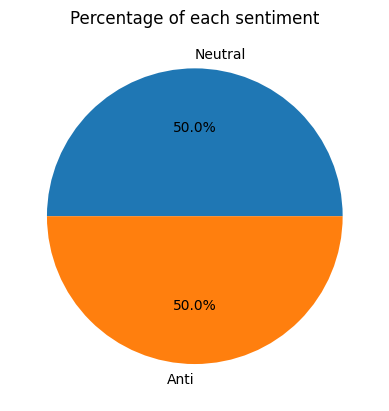

In [68]:
import matplotlib.pyplot as plt

# Get the counts of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=['Neutral', 'Anti'], autopct="%1.1f%%")
plt.title("Percentage of each sentiment")
plt.show()


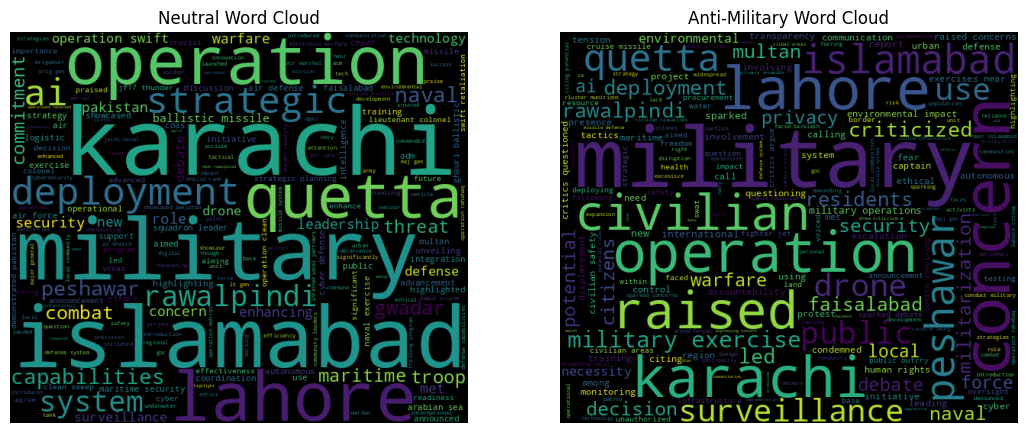

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create word clouds for label 0 and label 1
data_0 = df[df['sentiment'] == 0]['sentence'].str.cat(sep=' ')
data_1 = df[df['sentiment'] == 1]['sentence'].str.cat(sep=' ')

data_wc_0 = WordCloud(width=600, height=512).generate(data_0)
data_wc_1 = WordCloud(width=600, height=512).generate(data_1)

# Plot the word clouds
plt.figure(figsize=(13, 9))
plt.subplot(1, 2, 1)
plt.imshow(data_wc_0)
plt.title('Neutral Word Cloud')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(data_wc_1)
plt.title('Anti-Military Word Cloud')
plt.axis("off")

plt.show()


In [91]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df['sentence'], df['sentiment'], test_size=0.30, random_state=42)

In [81]:
# Vectorize text data
tfidf_vectorizer = TfidfVectorizer()
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_vectorized)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8787878787878788


In [82]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [83]:
def evaluate_model(model, X_train_vectorized, y_train, X_test_vectorized, y_test):
    # Train the model
    model.fit(X_train_vectorized, y_train)

    # Make predictions
    y_pred = model.predict(X_test_vectorized)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Calculate precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return model


Evaluating Logistic Regression:
Accuracy: 0.8787878787878788
Precision: 0.874251497005988
Recall: 0.8848484848484849
F1-Score: 0.8795180722891567


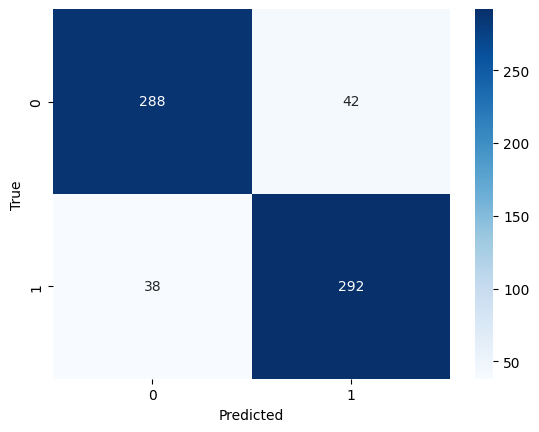

In [84]:
print("Evaluating Logistic Regression:")
lr_model = evaluate_model(LogisticRegression(), X_train_vectorized, y_train, X_test_vectorized, y_test)



Evaluating Naive Bayes:
Accuracy: 0.9
Precision: 0.9049079754601227
Recall: 0.8939393939393939
F1-Score: 0.8993902439024389


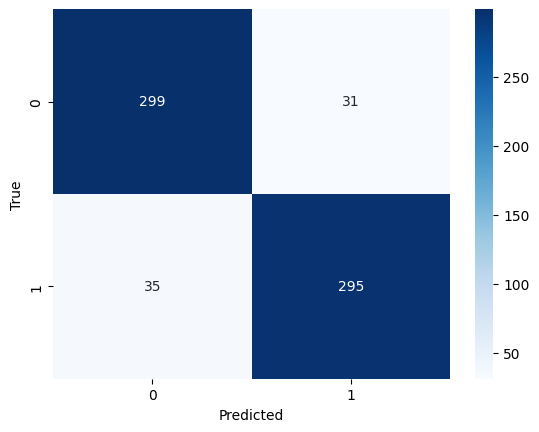

In [85]:
print("\nEvaluating Naive Bayes:")
nb_model = evaluate_model(MultinomialNB(), X_train_vectorized, y_train, X_test_vectorized, y_test)



Evaluating Support Vector Machine (SVM):
Accuracy: 0.8924242424242425
Precision: 0.9009287925696594
Recall: 0.8818181818181818
F1-Score: 0.891271056661562


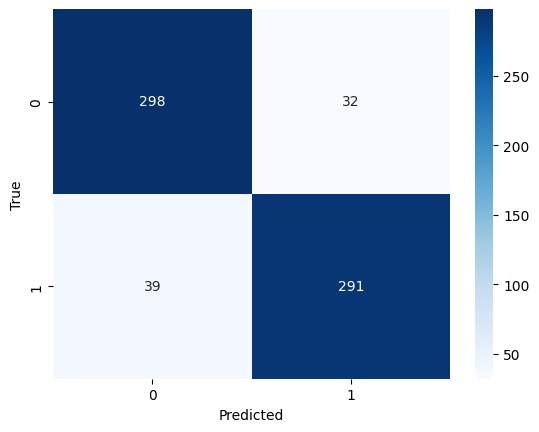

In [86]:
print("\nEvaluating Support Vector Machine (SVM):")
svm_model = evaluate_model(SVC(), X_train_vectorized, y_train, X_test_vectorized, y_test)



Evaluating Random Forest:
Accuracy: 0.8590909090909091
Precision: 0.8714733542319749
Recall: 0.8424242424242424
F1-Score: 0.8567026194144839


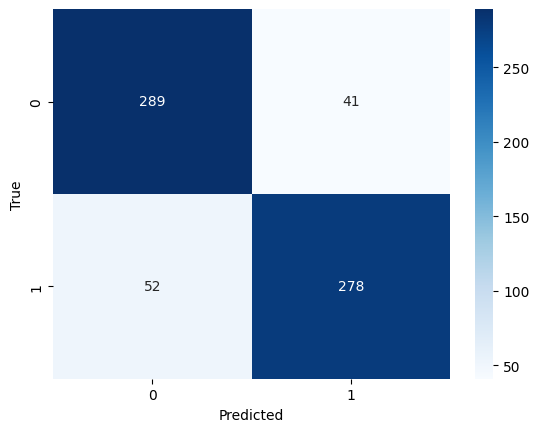

In [87]:
print("\nEvaluating Random Forest:")
rf_model = evaluate_model(RandomForestClassifier(), X_train_vectorized, y_train, X_test_vectorized, y_test)


In [88]:
def train_evaluate_model(model, X_train_vectorized, y_train, X_test_vectorized, y_test):
    # Train the model
    model.fit(X_train_vectorized, y_train)

    # Make predictions
    y_pred = model.predict(X_test_vectorized)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    # Return evaluation metrics and predictions
    return accuracy, precision, recall, f1, y_pred


In [89]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}

results = []

for name, model in models.items():
    accuracy, precision, recall, f1, y_pred = train_evaluate_model(model, X_train_vectorized, y_train, X_test_vectorized, y_test)
    results.append({"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1})

# Convert results to DataFrame
results_df = pd.DataFrame(results)


In [90]:
# Assuming 'results_df' contains the results from the previous step
results_df['Accuracy'] = results_df['Accuracy'].apply(lambda x: f"{x * 100:.2f}%")
results_df['Precision'] = results_df['Precision'].apply(lambda x: f"{x * 100:.2f}%")
results_df['Recall'] = results_df['Recall'].apply(lambda x: f"{x * 100:.2f}%")
results_df['F1-Score'] = results_df['F1-Score'].apply(lambda x: f"{x * 100:.2f}%")

# Display the modified DataFrame with percentages
print("Model Evaluation Metrics:")
display(results_df)


Model Evaluation Metrics:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,87.88%,87.43%,88.48%,87.95%
1,Naive Bayes,90.00%,90.49%,89.39%,89.94%
2,Support Vector Machine,89.24%,90.09%,88.18%,89.13%
3,Random Forest,85.91%,86.46%,85.15%,85.80%


In [93]:
real_sentence = "Public outcry ensued following Operation Sunrise in Karachi, with many questioning the necessity of such an intense military response."
preprocessed_sentence = preprocess_text(real_sentence)
vectorized_sentence = tfidf_vectorizer.transform([preprocessed_sentence])
prediction = lr_model.predict(vectorized_sentence)
sentiment_label = {0: 'neutral', 1: 'anti'}
predicted_sentiment = sentiment_label[prediction[0]]

print(f"Predicted sentiment: {predicted_sentiment}")


Predicted sentiment: anti


In [94]:
real_sentence = "Squadron Leader's critical decisions during Operation Sherdil in Mardan underscored the importance of air support in modern warfare."
preprocessed_sentence = preprocess_text(real_sentence)
vectorized_sentence = tfidf_vectorizer.transform([preprocessed_sentence])
prediction = lr_model.predict(vectorized_sentence)
sentiment_label = {0: 'neutral', 1: 'anti'}
predicted_sentiment = sentiment_label[prediction[0]]

print(f"Predicted sentiment: {predicted_sentiment}")


Predicted sentiment: neutral
